In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Animation function
from matplotlib import animation
from IPython.display import display, HTML

def plot_movie_mp4(image_array):
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array),interval=500)
    display(HTML(anim.to_html5_video()))

In [33]:
'''
r0 = [100,200,300,400]
r1 = range(0,10500,500)
r2 = r0+r1[1:]
'''
r2 = [200,500,1000,5000,1000,50000]
len(r2)


6

In [34]:
# GAN Samples
from PIL import Image

image_array1 = []
for indx,i in enumerate(r2):
    img_path = os.path.join('/media/narita/Data/neutrophils-gan/models/size-64-64_gan-adam/output-images/','fake_samples_'+str(i)+'.png')    
    x = np.array(Image.open(img_path))
    image_array1.insert(indx,(x))

    

In [ ]:
plot_movie_mp4(np.array(image_array1))

In [35]:
# WGAN Samples
from PIL import Image

image_array2 = []
for indx,i in enumerate(r2):
    img_path = os.path.join('/media/narita/Data/neutrophils-gan/models/size-64-64_wgan-rmsprop/output-images/','fake_samples_'+str(i)+'.png')    
    x = np.array(Image.open(img_path))
    image_array2.insert(indx,(x))

    

In [ ]:
plot_movie_mp4(np.array(image_array2))

In [36]:
# WGAN-GP Samples
from PIL import Image

image_array3 = []
for indx,i in enumerate(r2):
    img_path = os.path.join('/media/narita/Data/neutrophils-gan/models/size-64-64_wgangp-adam/output-images/','fake_samples_'+str(i)+'.png')    
    x = np.array(Image.open(img_path))
    image_array3.insert(indx,(x))

    

In [ ]:
plot_movie_mp4(np.array(image_array3))

### Display grid of images

In [38]:
all_image_arrs = image_array1 + image_array2 + image_array3

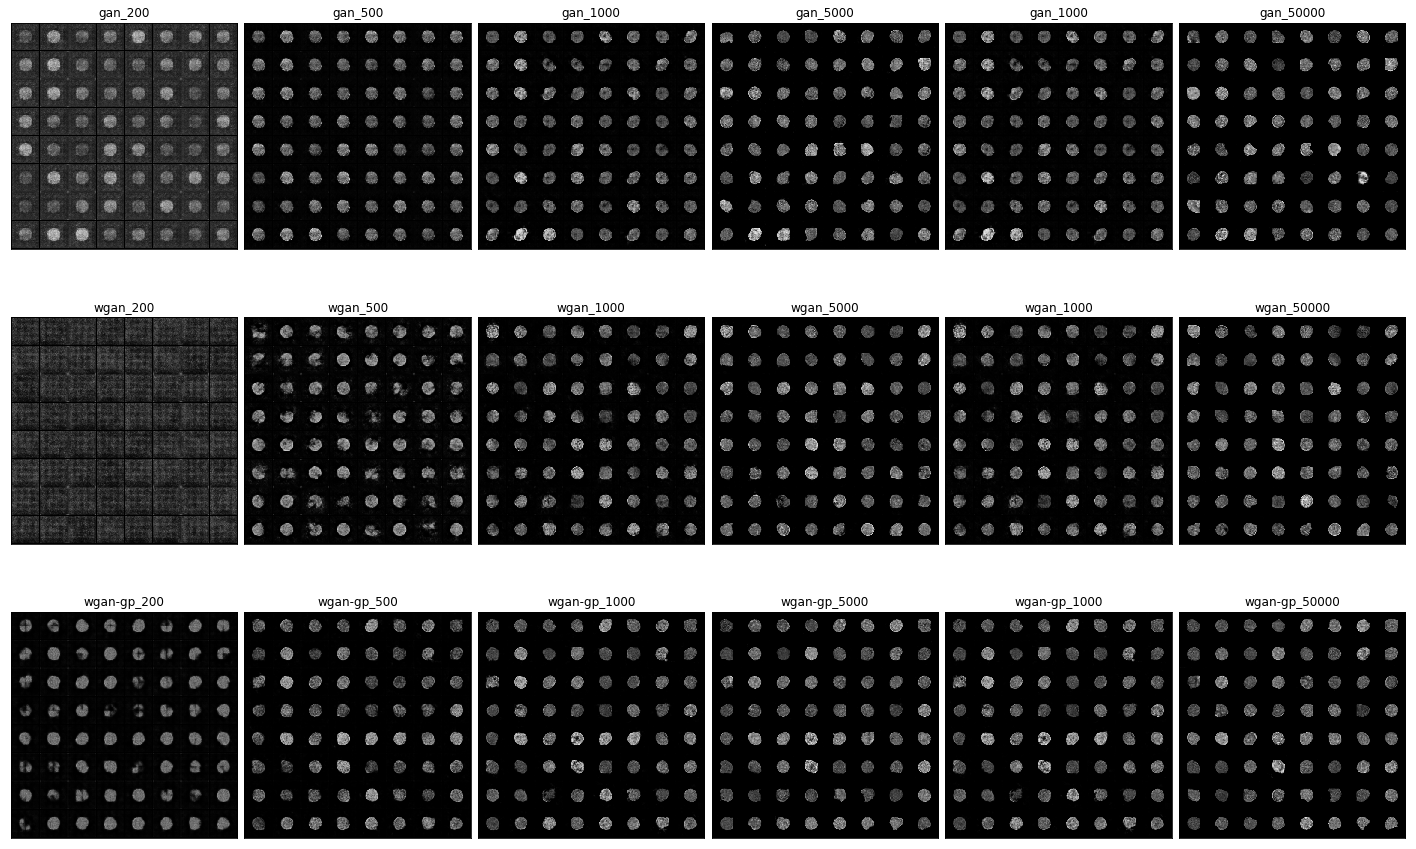

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()


methods = [
            'gan','gan','gan','gan','gan','gan','wgan','wgan','wgan','wgan','wgan','wgan',
             'wgan-gp','wgan-gp','wgan-gp','wgan-gp','wgan-gp','wgan-gp' 
          ]

fig, axes = plt.subplots(3, 6, figsize=(25,15),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.03)

for i,(ax, interp_method) in enumerate(zip(axes.flat, methods)):
    ax.imshow(all_image_arrs[i], cmap='viridis')
    ax.set_title(interp_method+'_'+str(r2[i%6]))

plt.show()